In [1]:
#import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

#filter warnings

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#read the dataset

df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Data Cleaning

In [3]:
#check the shape of the data

df.shape

(41188, 21)

In [4]:
#information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
#check the null/nan values of the data

df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
#check the names of the columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
df.shape

(41188, 21)

In [9]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [10]:
#Checking the dupilicate values in the dataframe

df.duplicated().sum()

12

##### Note : The above table shows that, there are 12 duplicates in the dataframe

In [11]:
#Removing the duplicates 

df.drop_duplicates(subset=None, inplace=True)
df.duplicated().sum()

0

<AxesSubplot:xlabel='y', ylabel='count'>

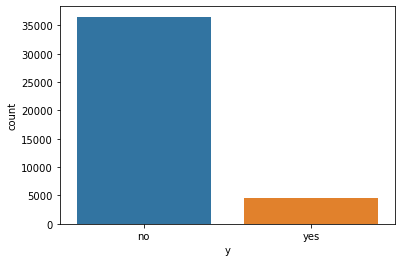

In [12]:
sns.countplot(x='y',data=df)

### Note : The above plot is shows that, the data is very skewed, so we addding duplicate the tuples corresponding to 'yes' to balance the data

In [13]:
d1=df.copy()
d2=d1[d1.y=='yes']
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
df=d1

<AxesSubplot:xlabel='y', ylabel='count'>

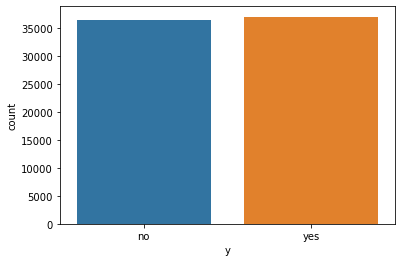

In [14]:
sns.countplot(x='y',data=df)

## Outliers Treatment

<AxesSubplot:xlabel='age'>

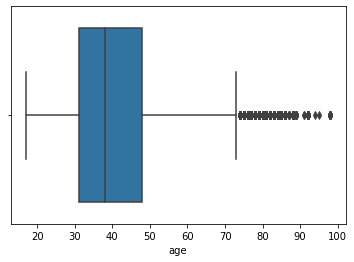

In [15]:
# checking outliers using box plot

sns.boxplot(df['age'])

In [16]:
#The boxplot uses the IQR method to display the data and the outliers.

Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(Q1)
print(Q3)

17.0
31.0
48.0


##### Note : In the preceding code, Q1 is the first quartile and Q3 is the third quartile.

In [17]:
#Now we find the upper fence and lower fence by adding the following code, 
#and print all the data above the upper fence and below the lower fence. 

Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)
print(Lower_Fence)
print(Upper_Fence)

5.5
73.5


In [18]:
#To print all the data above the upper fence and below the lower fence.

df[((df["age"] < Lower_Fence) |(df["age"] > Upper_Fence))]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27757,76,retired,married,university.degree,no,no,yes,cellular,mar,thu,...,9,999,0,nonexistent,-1.8,92.843,-50.0,1.757,5099.1,no
27800,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,no
27802,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,...,2,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27805,88,retired,divorced,basic.4y,no,yes,yes,cellular,mar,wed,...,5,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27808,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,6,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40727,86,retired,married,unknown,unknown,yes,no,cellular,sep,tue,...,1,999,0,nonexistent,-1.1,94.199,-37.5,0.877,4963.6,yes
40748,82,retired,divorced,basic.4y,no,yes,no,cellular,sep,thu,...,2,999,1,failure,-1.1,94.199,-37.5,0.879,4963.6,yes
40756,77,retired,married,basic.4y,no,yes,no,cellular,sep,thu,...,1,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,yes
40996,81,retired,married,basic.4y,no,yes,no,cellular,oct,wed,...,1,999,2,failure,-1.1,94.601,-49.5,1.016,4963.6,yes


In [19]:
df["age"] = np.where(df["age"] >73.5, Upper_Fence,df['age'])

<AxesSubplot:xlabel='age'>

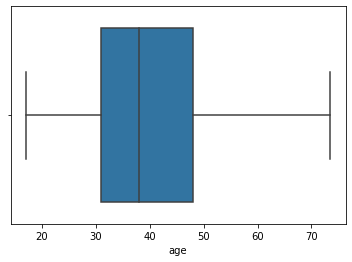

In [20]:
#verify , still outliers are present or not.

sns.boxplot(df['age'])

<AxesSubplot:xlabel='duration'>

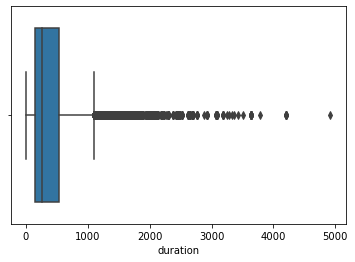

In [21]:
sns.boxplot(df.duration)

In [22]:
Q1 = df["duration"].quantile(0.25)
Q3 = df["duration"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(Q1)
print(Q3)

383.0
145.0
528.0


In [23]:
Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)
print(Lower_Fence)
print(Upper_Fence)

-429.5
1102.5


In [24]:
df[((df["duration"] < Lower_Fence) |(df["duration"] > Upper_Fence))]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
37,52.0,technician,married,basic.9y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
75,41.0,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49.0,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
164,39.0,services,divorced,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
388,28.0,unknown,single,unknown,unknown,yes,yes,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40838,32.0,admin.,married,high.school,no,yes,no,cellular,sep,mon,...,1,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,yes
40880,28.0,admin.,single,high.school,no,no,no,cellular,oct,wed,...,2,999,0,nonexistent,-1.1,94.601,-49.5,0.959,4963.6,yes
40970,24.0,admin.,single,university.degree,no,yes,no,cellular,oct,fri,...,3,3,2,success,-1.1,94.601,-49.5,0.993,4963.6,yes
41123,36.0,blue-collar,single,basic.6y,no,no,no,cellular,nov,tue,...,4,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,yes


In [25]:
df["duration"] = np.where(df["duration"] >1102.5, Upper_Fence,df['duration'])

<AxesSubplot:xlabel='duration'>

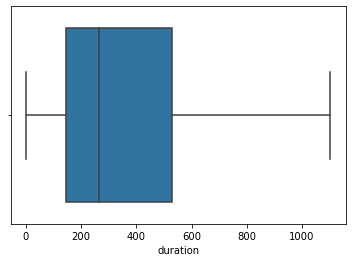

In [26]:
sns.boxplot(df['duration'])

## Exploratory Data Analysis (EDA)

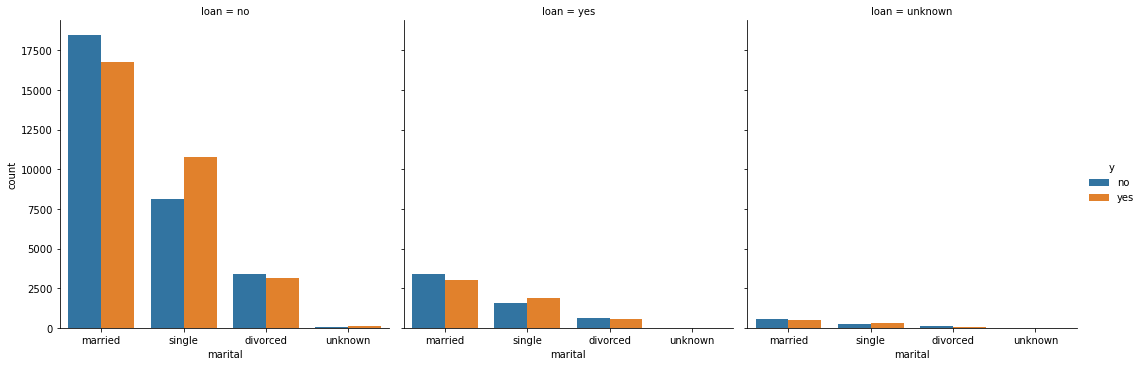

In [27]:
sns.catplot(x='marital',col='loan',hue='y',data=df,kind='count')

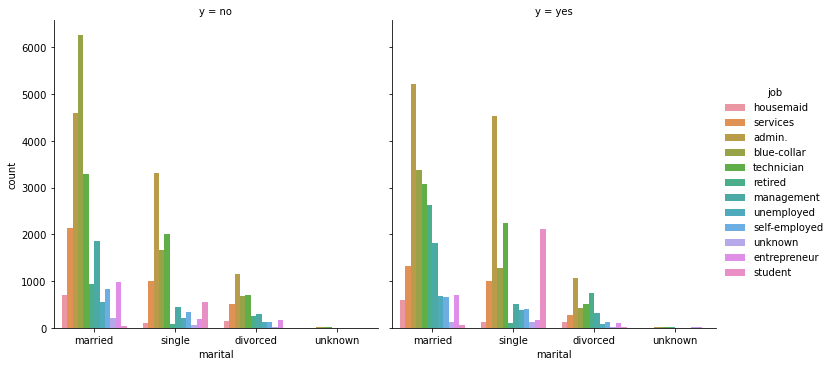

In [28]:
#plotting catplot for visualize the loan status of marital status of a person who has different jobs
sns.catplot(x='marital',col='y',hue='job',data=df,kind='count',)

##### from the above plot shows that, loan status of different marital status with respect to their jobs 

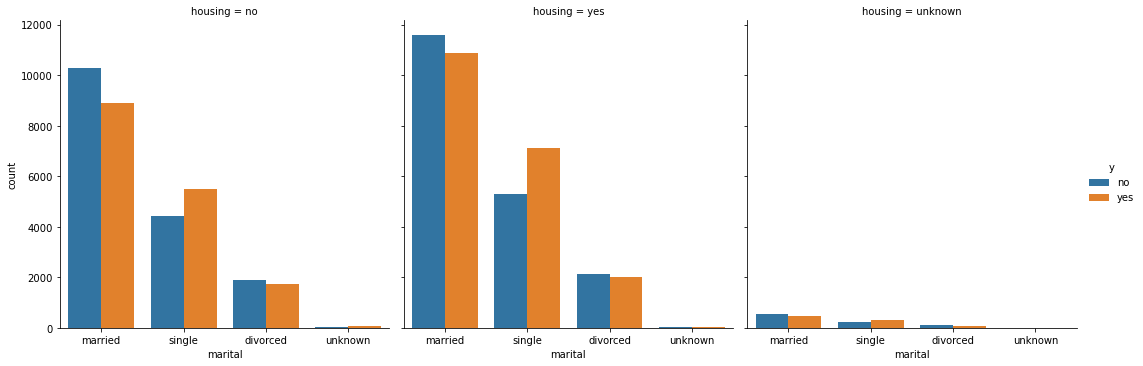

In [29]:
sns.catplot(x='marital',col='housing',hue='y',data=df,kind='count',)

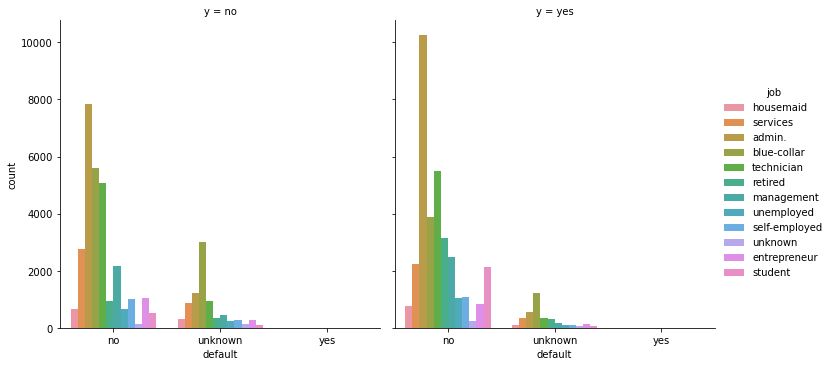

In [30]:
sns.catplot(x='default',col='y',hue='job',data=df,kind='count',)

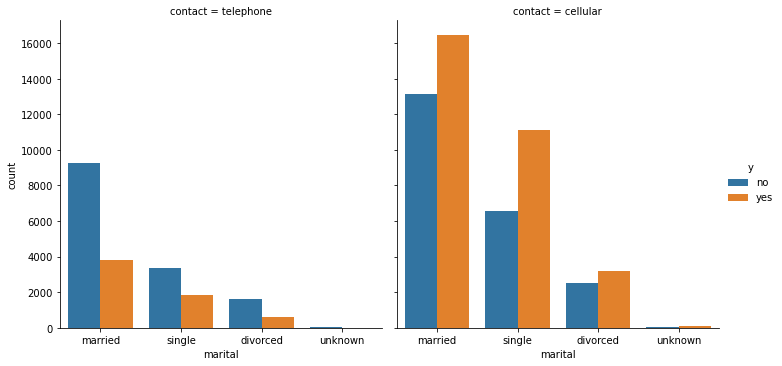

In [31]:
sns.catplot(x='marital',col='contact',hue='y',data=df,kind='count')

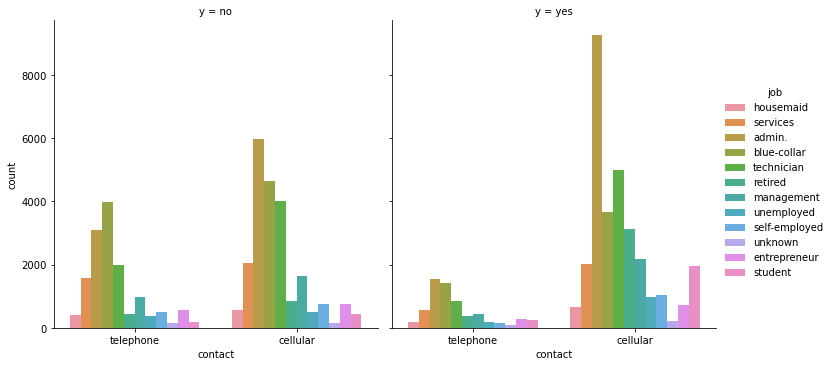

In [32]:
sns.catplot(x='contact',col='y',hue='job',data=df,kind='count',)

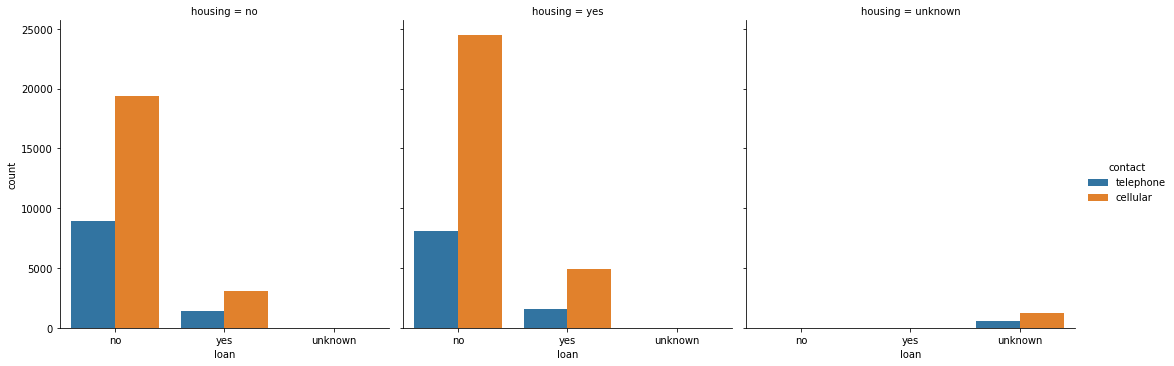

In [33]:
sns.catplot(x='loan',col='housing',hue='contact',data=df,kind='count',)

In [34]:
df.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [35]:
pd.value_counts(df.default)

no         61949
unknown    11697
yes            3
Name: default, dtype: int64

In [36]:
pd.value_counts(df.education)

university.degree      23847
high.school            16729
professional.course     9405
basic.9y                9356
basic.4y                7172
basic.6y                3607
unknown                 3487
illiterate                46
Name: education, dtype: int64

In [37]:
pd.value_counts(df.job)

admin.           19876
blue-collar      13719
technician       11849
services          6228
management        5220
retired           4756
student           2800
self-employed     2464
entrepreneur      2324
unemployed        2022
housemaid         1802
unknown            589
Name: job, dtype: int64

In [38]:
pd.value_counts(df.marital)

married     42638
single      22904
divorced     7943
unknown       164
Name: marital, dtype: int64

In [39]:
pd.value_counts(df.housing)

yes        39120
no         32790
unknown     1739
Name: housing, dtype: int64

In [40]:
pd.value_counts(df.loan)

no         60881
yes        11029
unknown     1739
Name: loan, dtype: int64

##### Note :  From the above column we see that, the "unknown" value has huge data. 
##### So we con't remove that value or we are not replacing to any value.we will go to label encoding method.

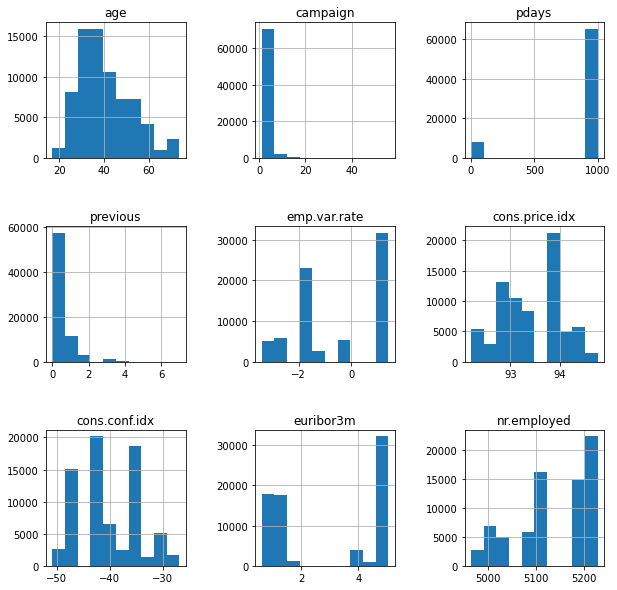

In [41]:
header = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
df.hist(column=header,figsize=(10,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

## Data Pre-Processing

In [42]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [43]:
scaler = MinMaxScaler()

num_vars = ['age', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

df[num_vars] = scaler.fit_transform(df[num_vars])

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.690265,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no
1,0.707965,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no
2,0.353982,services,married,high.school,no,yes,no,telephone,may,mon,...,1,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no
3,0.407080,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no
4,0.690265,services,married,high.school,no,no,yes,telephone,may,mon,...,1,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no


In [44]:
le = preprocessing.LabelEncoder()

df.job = le.fit_transform(df.job)
df.marital = le.fit_transform(df.marital)
df.education = le.fit_transform(df.education)
df.default = le.fit_transform(df.default)
df.housing = le.fit_transform(df.housing)
df.loan = le.fit_transform(df.loan)
df.contact = le.fit_transform(df.contact)
df.month = le.fit_transform(df.month)
df.day_of_week = le.fit_transform(df.day_of_week)
df.poutcome = le.fit_transform(df.poutcome)
df.y = le.fit_transform(df.y)

In [45]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.690265,3,1,0,0,0,0,1,6,1,...,1,1.0,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0
1,0.707965,7,1,3,1,0,0,1,6,1,...,1,1.0,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0
2,0.353982,7,1,3,0,2,0,1,6,1,...,1,1.0,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0
3,0.407080,0,1,1,0,0,0,1,6,1,...,1,1.0,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0
4,0.690265,7,1,3,0,0,2,1,6,1,...,1,1.0,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0


In [46]:
df.shape

(73649, 21)

In [47]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [48]:
X = df.drop('y', axis=1).values
Y = df['y'].values

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=42)

In [50]:
X_train.shape, X_test.shape

((51554, 20), (22095, 20))

In [51]:
y_train.shape, y_test.shape

((51554,), (22095,))

## Data Modeling - Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [53]:
from sklearn import metrics

In [54]:
y_pred = model.predict(X_test)

In [55]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


In [56]:
acc1 = metrics.accuracy_score(y_pred, y_test)
pre1 = metrics.precision_score(y_pred,y_test)
rec1 = metrics.recall_score(y_pred,y_test)
f1_1 = metrics.f1_score(y_pred,y_test)

In [57]:
table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression Model': [acc1, pre1, rec1, f1_1]})
table

,Metric,Logistic Regression Model
0,Accuracy,0.857932
1,Precision,0.877477
2,Recall,0.845560
3,F1 Score,0.861223


In [58]:
from sklearn.metrics import roc_curve, roc_auc_score

In [59]:
tpr,fpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])

In [60]:
thresholds

array([1.99993359e+00, 9.99933590e-01, 9.99914775e-01, ...,
       1.91260286e-02, 1.91236106e-02, 1.99767676e-03])

0.9271353809471136


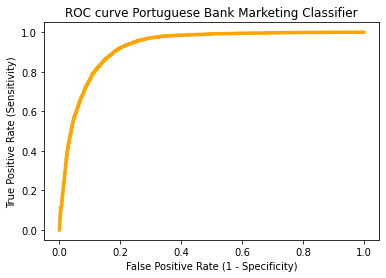

In [61]:
y_predict = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_predict)
plt.title('ROC curve Portuguese Bank Marketing Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr,color='orange',lw=3.5)
print(roc_auc_score(y_test,y_predict))
plt.show()